In [ ]:
!pip install rdkit-pypi
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from rdkit.Chem.Draw import IPythonConsole
from sklearn import svm
import pickle
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import EnumerateHeterocycles
from rdkit.Chem import Fragments
from scipy import stats

In [ ]:
logP=pd.read_csv('/content/logP_dataset.csv',names=['smiles','logP'])

In [ ]:
logP=logP.dropna()

In [ ]:
logP['mol'] = logP['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 
logP['mol'] = logP['mol'].apply(lambda x: Chem.AddHs(x))
def number_of_atoms(atom_list, data):
    for i in atom_list:
        data['num_of_{}_atoms'.format(i)] = data['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl','P','S'], logP)
from rdkit.Chem import Descriptors
logP['tpsa'] = logP['mol'].apply(lambda x: Descriptors.TPSA(x))
logP['mol_w'] = logP['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
logP['MaxAbsPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x, force=False))
logP['MaxPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MaxPartialCharge(x, force=False))
logP['MinAbsPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MinAbsPartialCharge(x, force=False))
logP['MinPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MinPartialCharge(x, force=False))
logP['num_valence_electrons'] = logP['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
logP['num_heteroatoms'] = logP['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
logP['Num_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumRings(x))
logP['Num_Rotatable_Bonds']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(x))
logP['Num_Saturated_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumSaturatedRings(x))
logP['Num_Heterocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumHeterocycles(x))
logP['Num_Aliphatic_Carbocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticCarbocycles(x))
logP['Num_Aliphatic_Heterocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticHeterocycles(x))
logP['Num_Aliphatic_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticRings(x))
logP['Num_Amide_Bonds']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAmideBonds(x))
logP['Num_Aromatic_Carbocycle']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticCarbocycles(x))
logP['Num_Aromatic_Heterocyle']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticHeterocycles(x))
logP['Num_Aromatic_rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticRings(x))
logP['Heterotatoms/C_atoms']=logP['num_heteroatoms']/logP['num_of_C_atoms']
logP['H_bonds_donors']=logP['mol'].apply(lambda x: Chem.Lipinski.NumHDonors(x))

In [ ]:
logP=logP.dropna()

In [ ]:
X=logP.drop(columns=['smiles','logP','mol'])
y=logP['logP']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
score=rf.score(X_test,y_test)
pickle.dump(rf,open('research_rf_model_24_inputs.pkl','wb'))


In [ ]:
len(X_test)

2866

In [ ]:
len(X_train)

11463

In [ ]:
len(logP)

14329

In [ ]:
score

0.9540803454020745

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
mean_squared_error(y_test,predictions)

0.07646295568736916

In [ ]:
X_test['logP_prediction']=predictions

In [ ]:
X_test

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Aliphatic_Carbocycles,Num_Aliphatic_Heterocycles,Num_Aliphatic_Rings,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,H_bonds_donors,logP_prediction
4479,1,0,0,1,0,0,0.00,128.909117,0.114199,0.077763,...,0,0,0,0,0,0,0,2.000000,0,1.676
4513,5,1,0,0,1,0,9.23,120.070402,0.359809,0.088274,...,0,0,0,0,0,0,0,0.400000,0,1.307
14399,5,1,0,1,0,0,20.23,122.049843,0.391890,0.210504,...,0,0,0,0,0,0,0,0.400000,1,1.502
4865,6,0,0,0,2,0,0.00,150.072724,0.099522,0.062536,...,0,0,0,0,0,0,0,0.333333,0,1.600
877,2,1,0,0,0,0,20.23,125.955619,0.395508,0.210078,...,0,0,0,0,0,0,0,1.000000,1,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,3,0,1,0,0,0,23.80,135.976186,0.257828,0.141158,...,0,0,0,0,0,0,0,0.666667,0,1.347
6425,5,0,0,0,0,2,0.00,135.030217,0.145557,0.081379,...,0,0,0,0,0,0,0,0.400000,0,2.480
11387,3,2,1,0,0,0,49.33,89.047678,0.394544,0.210129,...,0,0,0,1,0,0,0,1.000000,2,-1.037
3964,1,2,0,0,0,2,18.46,111.965271,0.294057,0.170429,...,0,0,0,0,0,0,0,4.000000,1,0.886


In [ ]:
indexes_list=list(X_test.index)

In [ ]:
target_molecules=logP.loc[indexes_list]

In [ ]:
logP_experimental=list(target_molecules['logP'])

In [ ]:
X_test['Experimental_logP']=logP_experimental

In [ ]:
X_test['relative_percent_difference']=((X_test['Experimental_logP']-X_test['logP_prediction'])/(abs(X_test['logP_prediction'])+abs(X_test['Experimental_logP'])))*2

In [ ]:
X_test['|relative_percent_difference|']=abs(((X_test['Experimental_logP']-X_test['logP_prediction'])/(abs(X_test['logP_prediction'])+abs(X_test['Experimental_logP'])))*2)

In [ ]:
list_rpd=list(X_test['relative_percent_difference'])
list_prediction_class=[]

In [ ]:
len(list_rpd)

2866

In [ ]:
for i in range(len(list_rpd)):
  if list_rpd[i]==0:
    list_prediction_class.append(1)
  elif list_rpd[i]>= -0.3 and list_rpd[i]<= 0.3:
    list_prediction_class.append(1)
  else:
    list_prediction_class.append(0)

In [ ]:
score

0.9540803454020745

In [ ]:
X_test['prediction_class']=list_prediction_class

In [ ]:
list_prediction_class.count(1)

2144

In [ ]:
list_prediction_class.count(0)

722

In [ ]:
X_test

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,H_bonds_donors,logP_prediction,Experimental_logP,relative_percent_difference,|relative_percent_difference|,prediction_class
4479,1,0,0,1,0,0,0.00,128.909117,0.114199,0.077763,...,0,0,0,2.000000,0,1.676,1.7,1.421801e-02,1.421801e-02,1
4513,5,1,0,0,1,0,9.23,120.070402,0.359809,0.088274,...,0,0,0,0.400000,0,1.307,1.3,-5.370157e-03,5.370157e-03,1
14399,5,1,0,1,0,0,20.23,122.049843,0.391890,0.210504,...,0,0,0,0.400000,1,1.502,1.5,-1.332445e-03,1.332445e-03,1
4865,6,0,0,0,2,0,0.00,150.072724,0.099522,0.062536,...,0,0,0,0.333333,0,1.600,1.4,-1.333333e-01,1.333333e-01,1
877,2,1,0,0,0,0,20.23,125.955619,0.395508,0.210078,...,0,0,0,1.000000,1,0.200,0.2,1.942890e-15,1.942890e-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,3,0,1,0,0,0,23.80,135.976186,0.257828,0.141158,...,0,0,0,0.666667,0,1.347,0.4,-1.084144e+00,1.084144e+00,0
6425,5,0,0,0,0,2,0.00,135.030217,0.145557,0.081379,...,0,0,0,0.400000,0,2.480,2.4,-3.278689e-02,3.278689e-02,1
11387,3,2,1,0,0,0,49.33,89.047678,0.394544,0.210129,...,0,0,0,1.000000,2,-1.037,-1.1,-5.896116e-02,5.896116e-02,1
3964,1,2,0,0,0,2,18.46,111.965271,0.294057,0.170429,...,0,0,0,4.000000,1,0.886,1.0,1.208908e-01,1.208908e-01,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


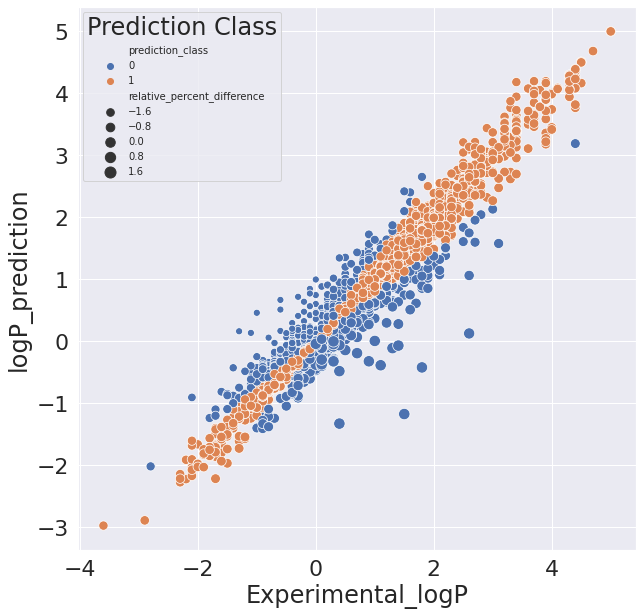

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Experimental_logP',y='logP_prediction',data= X_test,hue='prediction_class',size='relative_percent_difference',sizes=(50,130))
plt.legend(loc='upper-left',prop={'size':10},fancybox=True,title='Prediction Class')
sns.set(font_scale=2)
sns.set_style('darkgrid')
plt.show()

In [ ]:
bad_predicted_logP=X_test[X_test['prediction_class']==0]

In [ ]:
good_predicted_logP=X_test[X_test['prediction_class']==1]

In [ ]:
indexes_bad_predicted=list(bad_predicted_logP.index)
indexes_good_predicted=list(good_predicted_logP.index)
smiles_for_bad_predicted_df=logP.loc[indexes_bad_predicted]
smiles_for_good_predicted_df=logP.loc[indexes_good_predicted]
smiles_for_bad_predicted_df.head(3)

,smiles,logP,mol,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,...,Num_Heterocycles,Num_Aliphatic_Carbocycles,Num_Aliphatic_Heterocycles,Num_Aliphatic_Rings,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,H_bonds_donors
6120,[2H]C([2H])(CO)C([2H])([2H])C(C)O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f4e41f41f30>,5,2,0,0,0,0,40.46,...,0,0,0,0,0,0,0,0,0.4,2
3262,CC(CNC)CP,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f4e4226d530>,5,0,1,0,1,0,12.03,...,0,0,0,0,0,0,0,0,0.4,1
1816,C(CI)C(N)N,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f4e421fb490>,3,0,2,0,0,0,52.04,...,0,0,0,0,0,0,0,0,1.0,2


In [ ]:
bad_predicted_logP['smiles_molecule']=smiles_for_bad_predicted_df['smiles']
good_predicted_logP['smiles_molecule']=smiles_for_good_predicted_df['smiles']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(bad_predicted_logP)+len(good_predicted_logP)

2866

In [ ]:
bad_predicted_logP['absolute_error']=abs(bad_predicted_logP['Experimental_logP']-bad_predicted_logP['logP_prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP['prediction-experimental']=bad_predicted_logP['logP_prediction']-bad_predicted_logP['Experimental_logP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP_minus=bad_predicted_logP[bad_predicted_logP['prediction-experimental']<0]
bad_predicted_logP_plus=bad_predicted_logP[bad_predicted_logP['prediction-experimental']>0]

In [ ]:
len(bad_predicted_logP)

722

In [ ]:
len(good_predicted_logP)

2144

In [ ]:
len(bad_predicted_logP)+len(good_predicted_logP)

2866

In [ ]:
bad_predicted_logP_minus=bad_predicted_logP_minus.sort_values(by='relative_percent_difference',ascending=False)
bad_predicted_logP_plus=bad_predicted_logP_plus.sort_values(by='relative_percent_difference',ascending=False)

In [ ]:
bad_predicted_logP_minus1=bad_predicted_logP_minus.sort_values(by='absolute_error',ascending=False)
bad_predicted_logP_plus1=bad_predicted_logP_plus.sort_values(by='absolute_error',ascending=False)

In [ ]:
bad_predicted_logP_minus['mol']=bad_predicted_logP_minus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_plus['mol']=bad_predicted_logP_plus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_minus1['mol']=bad_predicted_logP_minus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_plus1['mol']=bad_predicted_logP_plus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

In [ ]:
bad_predicted_logP_minus.to_excel('tabla1_<0.xlsx',index=False)
bad_predicted_logP_plus.to_excel('tabla2_>0.xlsx',index=False)
bad_predicted_logP_minus1.to_excel('tabla3_<0.xlsx',index=False)
bad_predicted_logP_plus1.to_excel('tabla4>0.xlsx',index=False)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


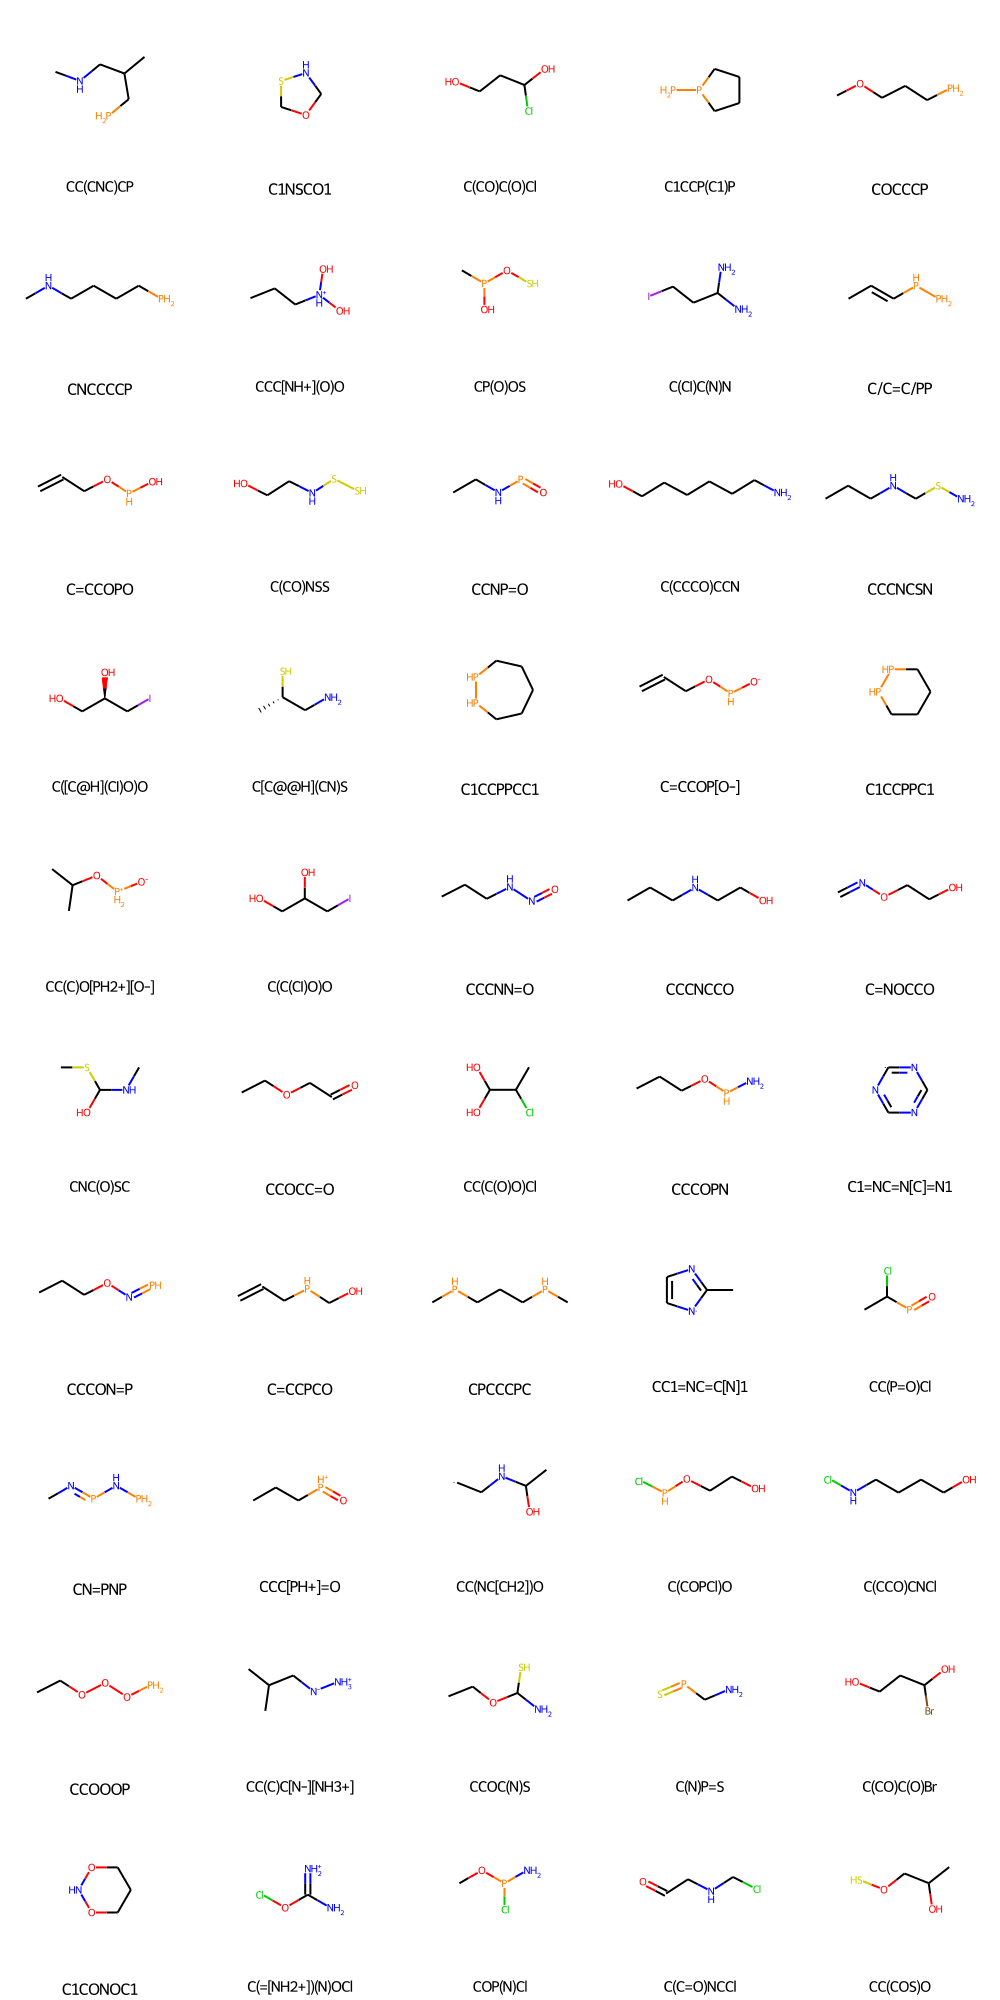

In [ ]:
mol_images2=bad_predicted_logP_minus.mol
Draw.MolsToGridImage(mol_images2, molsPerRow=5, useSVG=True, legends=list(bad_predicted_logP_minus['smiles_molecule']))

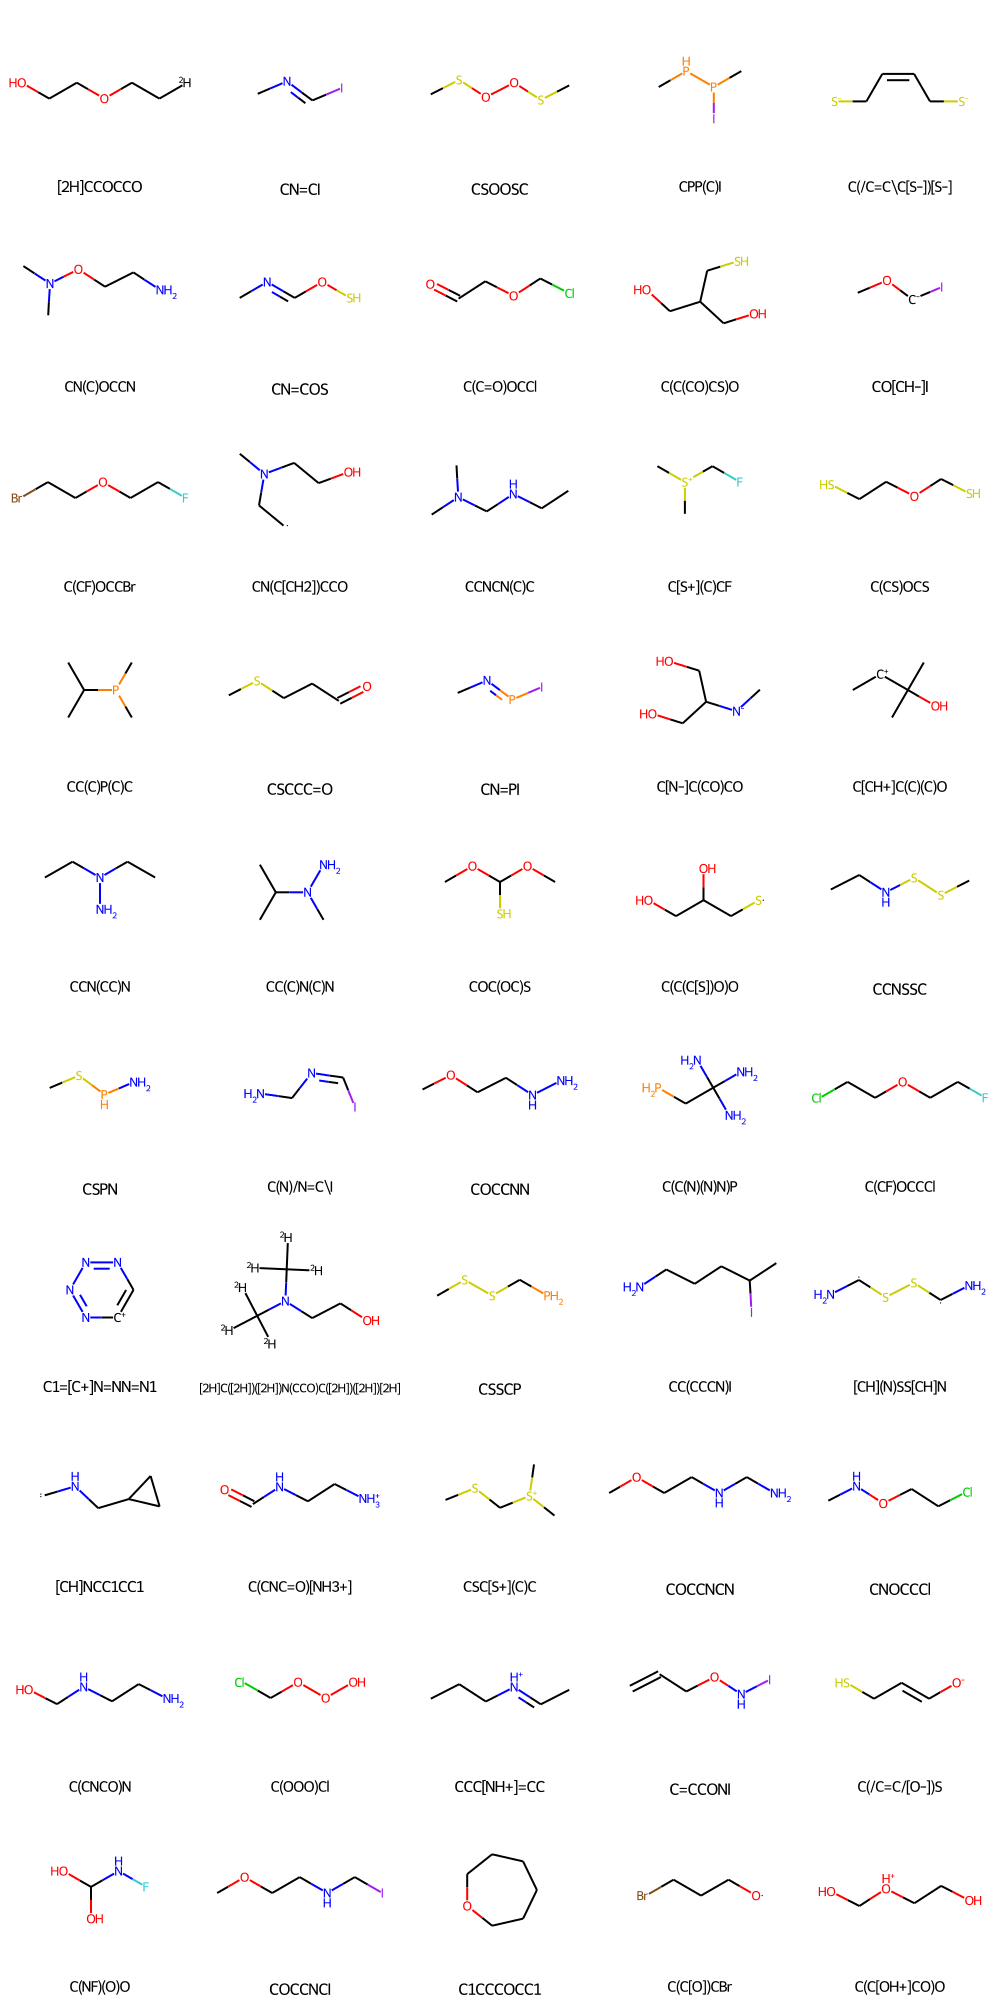

In [ ]:
mol_images3=bad_predicted_logP_plus.mol
Draw.MolsToGridImage(mol_images3, molsPerRow=5, useSVG=True, legends=list(bad_predicted_logP_plus['smiles_molecule']))

In [ ]:
good_predicted_logP['mol']=good_predicted_logP['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
good_predicted_logP.to_excel('good_predicted_logP.xlsx',index=False)

In [ ]:
bad_predicted_logP['mol']=bad_predicted_logP['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP.to_excel('bad_predicted_logP.xlsx',index=False)

In [ ]:
bad_predicted_logP.columns

Index(['num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'num_of_P_atoms', 'num_of_S_atoms', 'tpsa', 'mol_w',
       'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge',
       'MinPartialCharge', 'num_valence_electrons', 'num_heteroatoms',
       'Num_Rings', 'Num_Rotatable_Bonds', 'Num_Saturated_Rings',
       'Num_Heterocycles', 'Num_Aliphatic_Carbocycles',
       'Num_Aliphatic_Heterocycles', 'Num_Aliphatic_Rings', 'Num_Amide_Bonds',
       'Num_Aromatic_Carbocycle', 'Num_Aromatic_Heterocyle',
       'Num_Aromatic_rings', 'Heterotatoms/C_atoms', 'H_bonds_donors',
       'logP_prediction', 'Experimental_logP', 'relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'absolute_error', 'prediction-experimental', 'mol'],
      dtype='object')

In [ ]:
good_predicted_logP.columns

Index(['num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'num_of_P_atoms', 'num_of_S_atoms', 'tpsa', 'mol_w',
       'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge',
       'MinPartialCharge', 'num_valence_electrons', 'num_heteroatoms',
       'Num_Rings', 'Num_Rotatable_Bonds', 'Num_Saturated_Rings',
       'Num_Heterocycles', 'Num_Aliphatic_Carbocycles',
       'Num_Aliphatic_Heterocycles', 'Num_Aliphatic_Rings', 'Num_Amide_Bonds',
       'Num_Aromatic_Carbocycle', 'Num_Aromatic_Heterocyle',
       'Num_Aromatic_rings', 'Heterotatoms/C_atoms', 'H_bonds_donors',
       'logP_prediction', 'Experimental_logP', 'relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'],
      dtype='object')

In [ ]:
bad_heatmap=bad_predicted_logP.drop(columns=['relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'])

In [ ]:
good_heatmap=good_predicted_logP.drop(columns=['relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'])

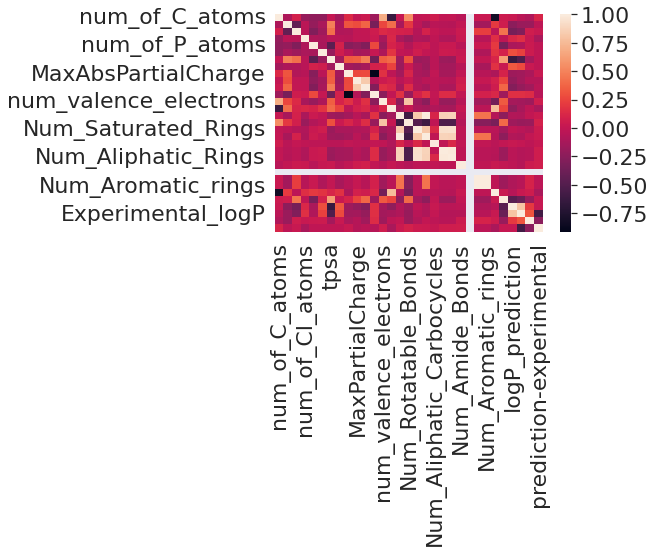

In [ ]:
sns.heatmap(bad_heatmap.corr())
sns.set(font_scale=.5)

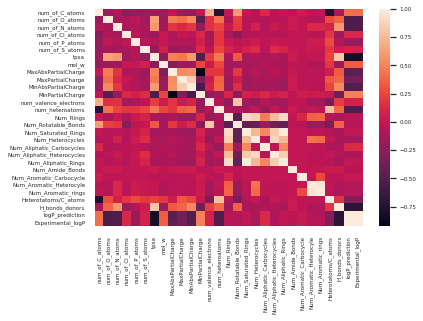

In [ ]:
sns.heatmap(good_heatmap.corr())
sns.set(font_scale=1)

In [ ]:
bad_heatmap.corr()

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,H_bonds_donors,logP_prediction,Experimental_logP,absolute_error,prediction-experimental
num_of_C_atoms,1.000000,-0.091881,0.085365,-0.200695,-0.218864,-0.221786,0.012618,-0.134676,0.140334,0.004994,...,-0.043502,NaN,0.030117,0.030117,-0.821580,0.044515,0.035660,-0.034257,-0.077894,0.106166
num_of_O_atoms,-0.091881,1.000000,-0.425954,-0.034009,-0.201036,-0.110505,0.491244,-0.093148,0.314212,0.285710,...,0.003917,NaN,-0.138360,-0.138360,0.212665,0.063561,-0.234192,-0.177126,-0.175582,-0.023069
num_of_N_atoms,0.085365,-0.425954,1.000000,-0.041683,-0.292210,-0.157690,0.424491,-0.080746,-0.072310,-0.007373,...,0.041053,NaN,0.224209,0.224209,-0.027947,0.434029,-0.333346,-0.288778,0.062875,0.028623
num_of_Cl_atoms,-0.200695,-0.034009,-0.041683,1.000000,-0.088448,-0.105105,-0.031768,-0.045267,-0.046078,-0.002989,...,0.030256,NaN,-0.048576,-0.048576,0.157905,-0.013456,0.122504,0.165716,0.025484,-0.110428
num_of_P_atoms,-0.218864,-0.201036,-0.292210,-0.088448,1.000000,-0.115148,-0.451457,0.090179,-0.259340,-0.219695,...,-0.042789,NaN,0.032913,0.032913,0.214817,-0.327857,-0.101708,-0.076574,0.036808,-0.010607
num_of_S_atoms,-0.221786,-0.110505,-0.157690,-0.105105,-0.115148,1.000000,-0.181464,0.065224,-0.037352,-0.137866,...,0.017567,NaN,-0.085236,-0.085236,0.182420,0.094185,0.292980,0.244562,0.048649,-0.009654
tpsa,0.012618,0.491244,0.424491,-0.031768,-0.451457,-0.181464,1.000000,-0.142188,0.339354,0.350498,...,0.036139,NaN,0.004724,0.004724,0.117996,0.625863,-0.631521,-0.509136,-0.129556,-0.009402
mol_w,-0.134676,-0.093148,-0.080746,-0.045267,0.090179,0.065224,-0.142188,1.000000,-0.141887,-0.171706,...,-0.050879,NaN,-0.113540,-0.113540,0.172180,0.026289,0.334320,0.279487,0.030038,-0.011715
MaxAbsPartialCharge,0.140334,0.314212,-0.072310,-0.046078,-0.259340,-0.037352,0.339354,-0.141887,1.000000,0.274801,...,-0.006442,NaN,-0.050122,-0.050122,-0.094874,0.100301,-0.160078,-0.143642,-0.098318,0.022072
MaxPartialCharge,0.004994,0.285710,-0.007373,-0.002989,-0.219695,-0.137866,0.350498,-0.171706,0.274801,1.000000,...,0.056586,NaN,0.020983,0.020983,0.088249,0.252893,-0.210122,-0.137371,-0.057144,-0.056830


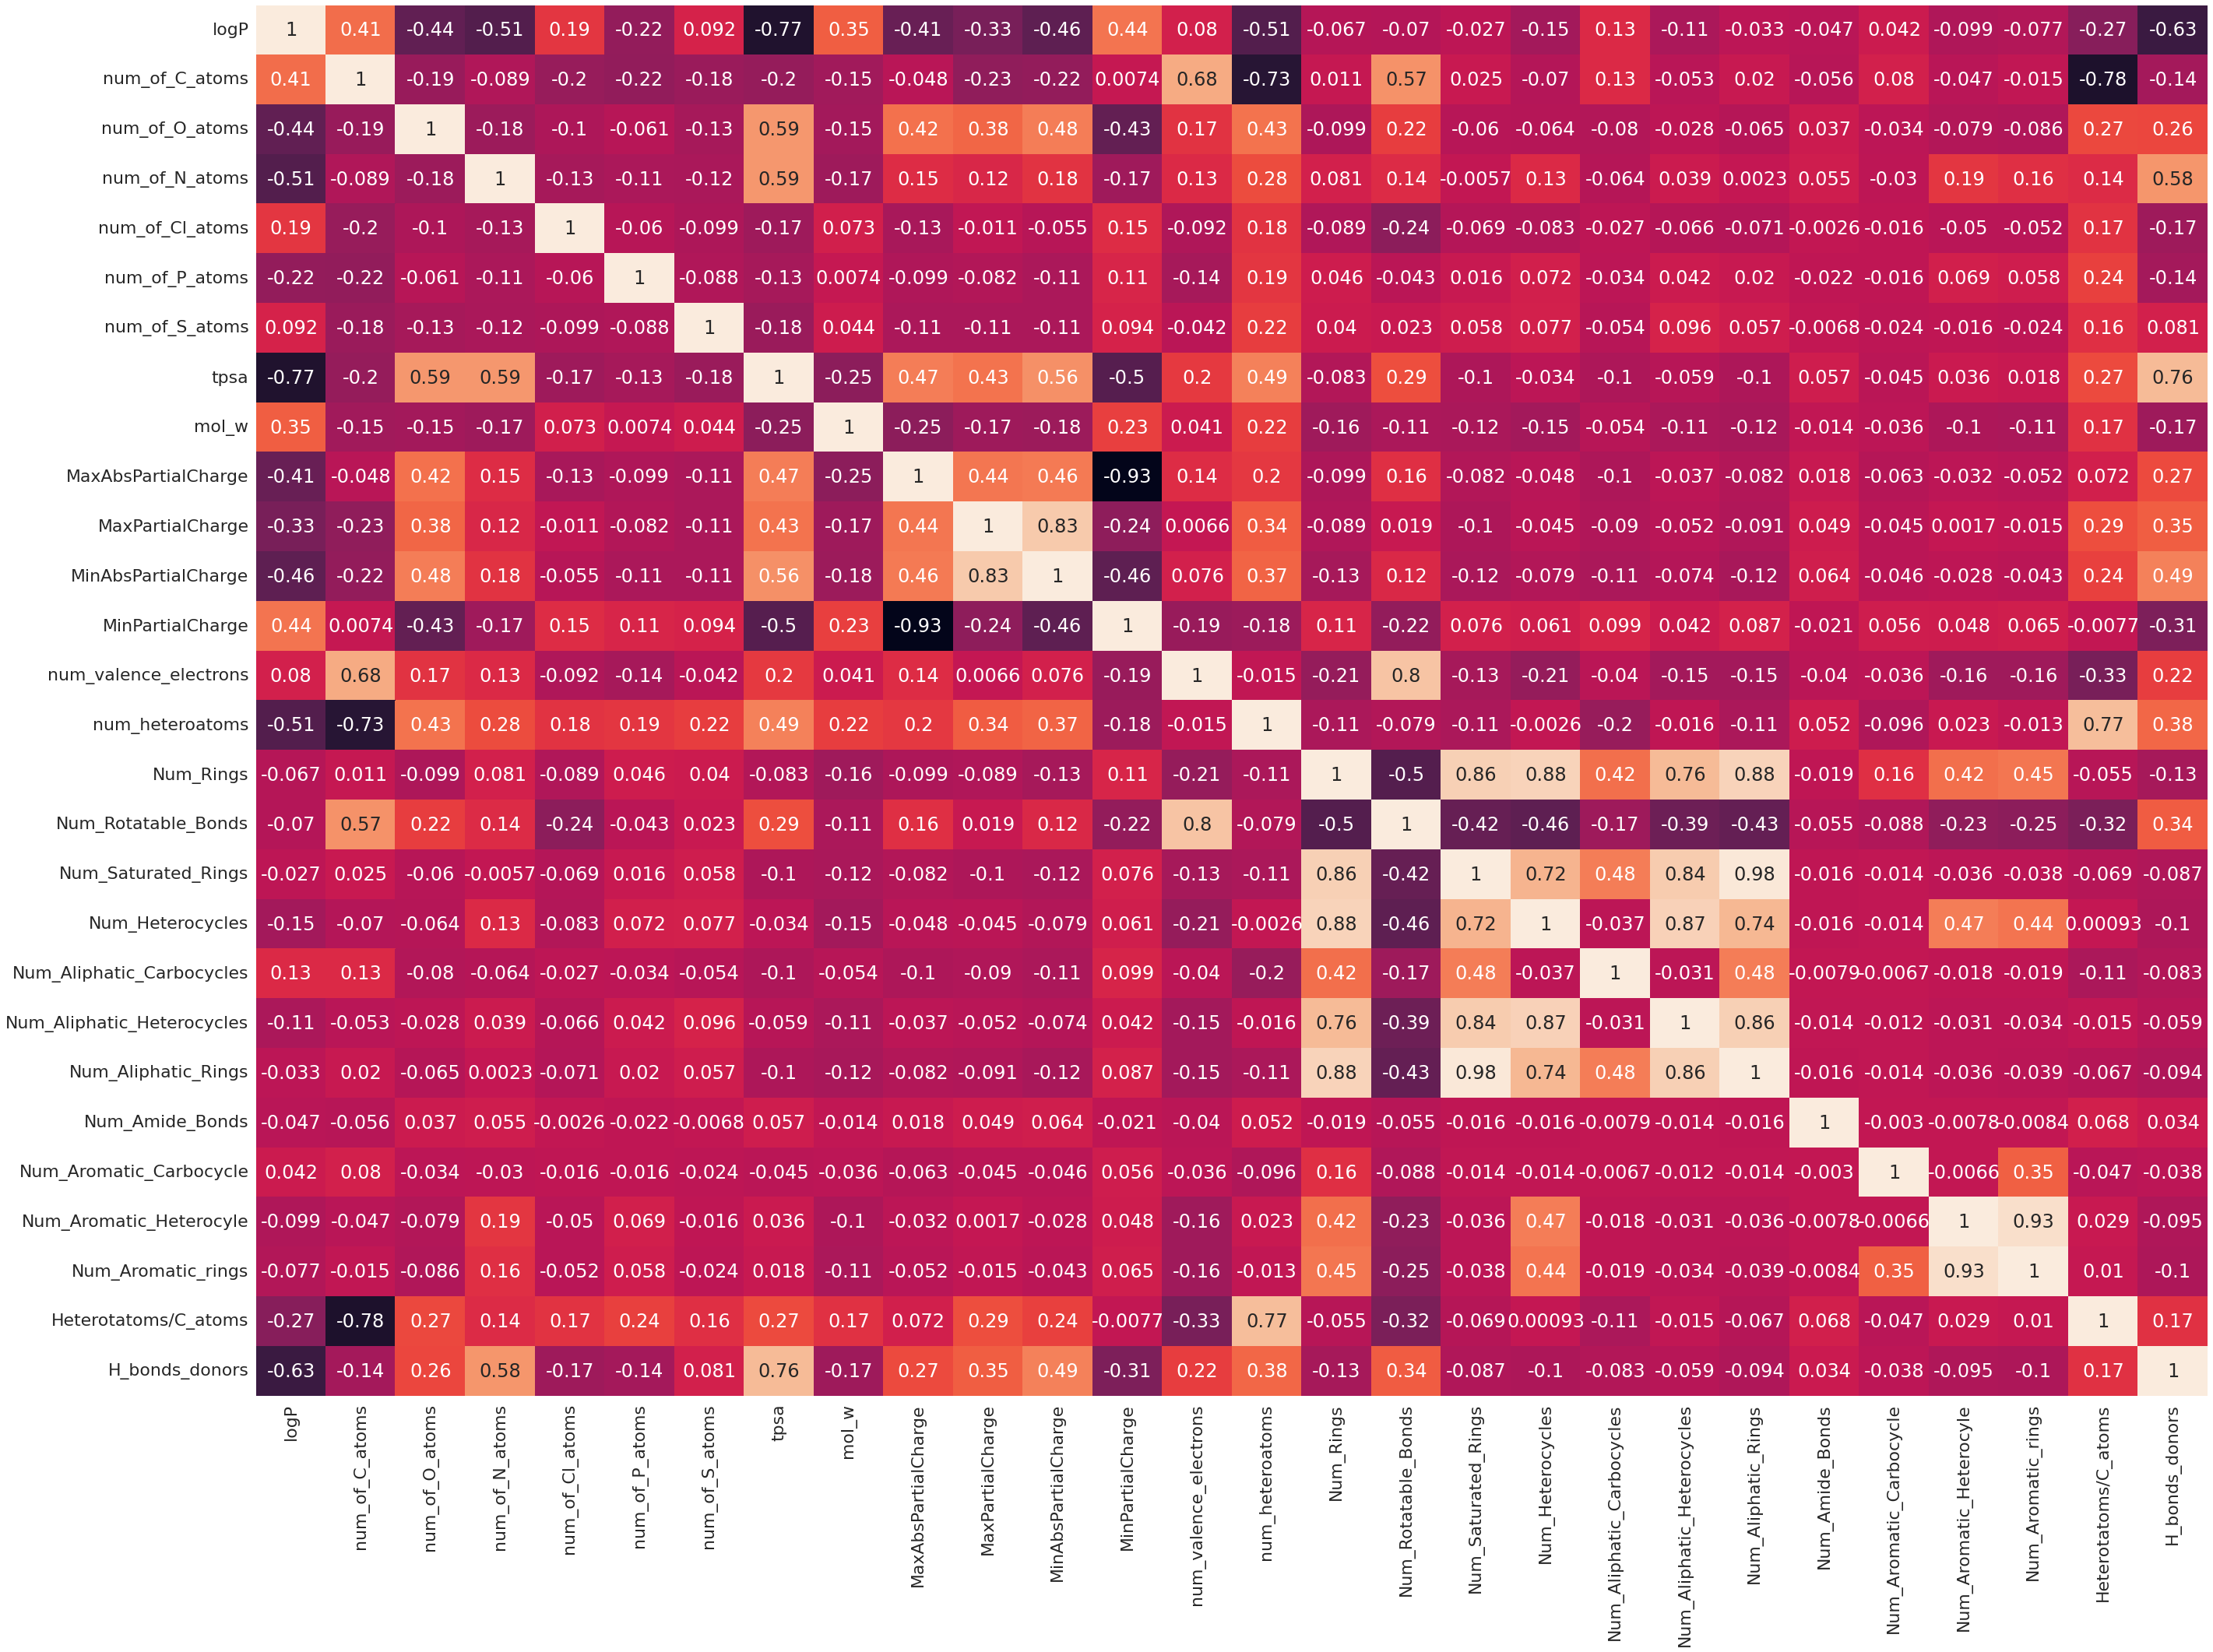

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(logP.corr(),annot=True,cbar=False)
plt.tight_layout()

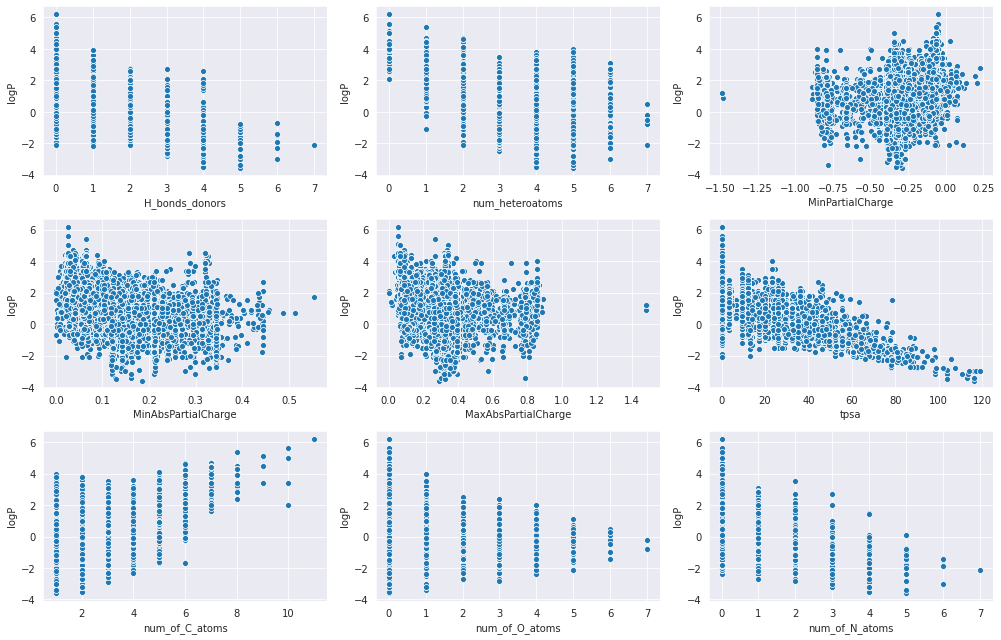

In [ ]:
fig, axes = plt.subplots(3, 3,figsize=(14,9))
sns.scatterplot(logP['H_bonds_donors'],logP['logP'],ax=axes[0,0])
sns.scatterplot(logP['num_heteroatoms'],logP['logP'],ax=axes[0,1])
sns.scatterplot(logP['MinPartialCharge'],logP['logP'],ax=axes[0,2])
sns.scatterplot(logP['MinAbsPartialCharge'],logP['logP'],ax=axes[1,0])
sns.scatterplot(logP['MaxAbsPartialCharge'],logP['logP'],ax=axes[1,1])
sns.scatterplot(logP['tpsa'],logP['logP'],ax=axes[1,2])
sns.scatterplot(logP['num_of_C_atoms'],logP['logP'],ax=axes[2,0])
sns.scatterplot(logP['num_of_O_atoms'],logP['logP'],ax=axes[2,1])
sns.scatterplot(logP['num_of_N_atoms'],logP['logP'],ax=axes[2,2])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


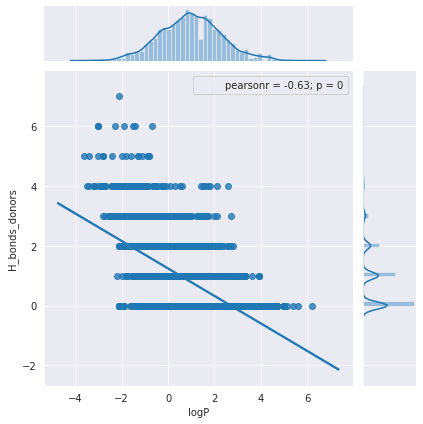

In [ ]:
sns.jointplot(logP['logP'],logP['H_bonds_donors'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


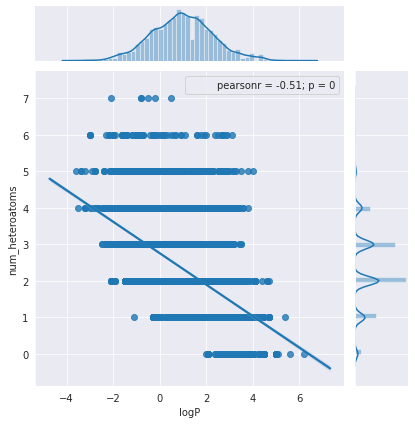

In [ ]:
sns.jointplot(logP['logP'],logP['num_heteroatoms'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


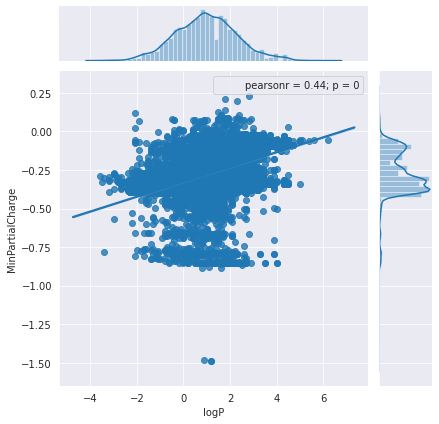

In [ ]:
sns.jointplot(logP['logP'],logP['MinPartialCharge'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


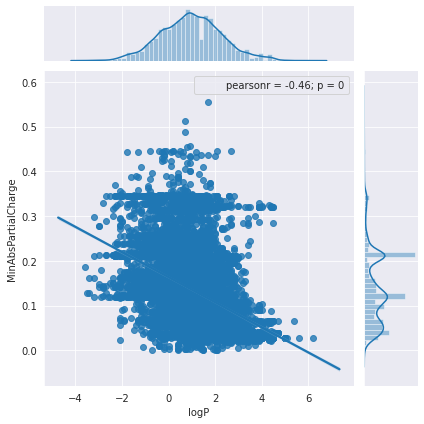

In [ ]:
sns.jointplot(logP['logP'],logP['MinAbsPartialCharge'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


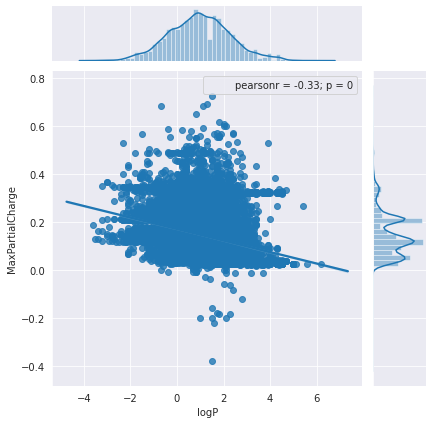

In [ ]:
sns.jointplot(logP['logP'],logP['MaxPartialCharge'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


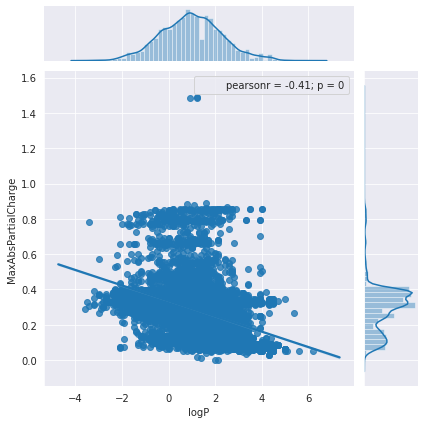

In [ ]:
sns.jointplot(logP['logP'],logP['MaxAbsPartialCharge'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


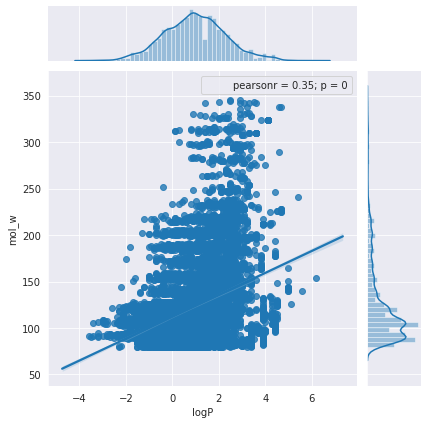

In [ ]:
sns.jointplot(logP['logP'],logP['mol_w'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


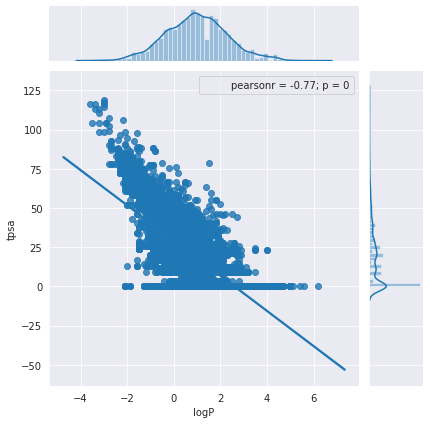

In [ ]:
sns.jointplot(logP['logP'],logP['tpsa'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


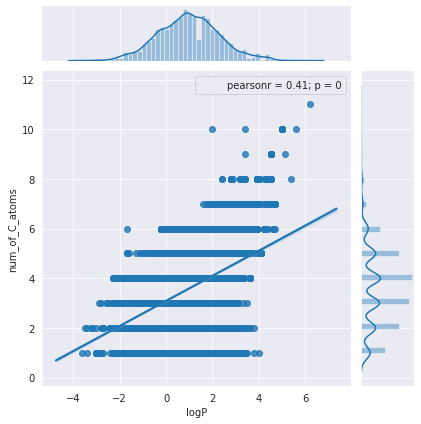

In [ ]:
sns.jointplot(logP['logP'],logP['num_of_C_atoms'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


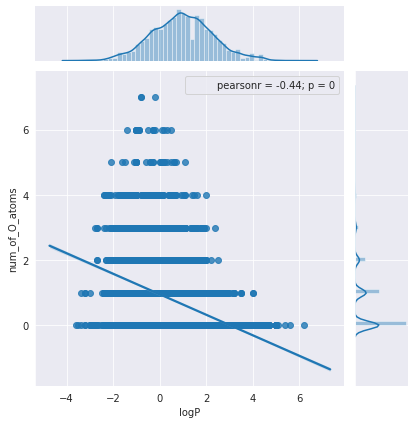

In [ ]:
sns.jointplot(logP['logP'],logP['num_of_O_atoms'],kind='reg').annotate(stats.pearsonr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


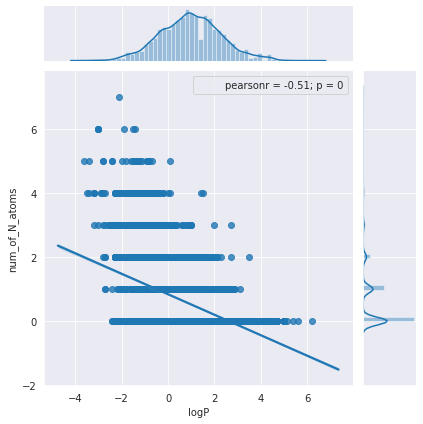

In [ ]:
sns.jointplot(logP['logP'],logP['num_of_N_atoms'],kind='reg').annotate(stats.pearsonr)
sns.set_style('darkgrid')